In [8]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/jorge/thesis')

from text3d2video.utilities.testing_utils import gradient_img

from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from torch import Tensor
import torch
from text3d2video.util import sample_feature_map_ndc
import torchvision.transforms.functional as TF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visual Verification

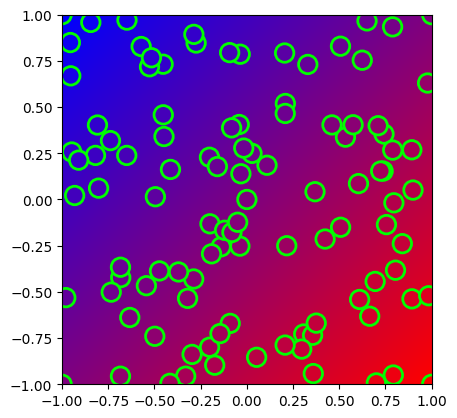

In [7]:
# .create image
image = gradient_img(res=200)
image = TF.to_tensor(image)

# create coords
corner_coords = Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1], [0, 0]])
rand_coords = torch.rand(100, 2) * 2 - 1
coords = torch.cat([corner_coords, rand_coords], dim=0)

sample = sample_feature_map_ndc(image, coords)

# plot image, point and color
fig, axs = plt.subplots(1)
ax_img = axs

ax_img.imshow(TF.to_pil_image(image), extent=[-1, 1, -1, 1])

res = image.shape[-1]
for i, coord in enumerate(coords):
    color = sample[i].numpy()
    circle = Circle(coord, radius=0.05, linewidth=2, edgecolor="lime", facecolor=color)
    ax_img.add_patch(circle)
